In [1]:
import xgboost
from xgboost import XGBClassifier
import shap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

/home/shengguang/PycharmProjects/uav_security/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### XGBoost example

In [10]:
# train an XGBoost model
X, y = shap.datasets.california()

model = xgboost.XGBRegressor().fit(X, y)
X.shape


(20640, 8)

In [3]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)
# shap_values

In [4]:
shap_values.values.shape, shap_values.base_values.shape, shap_values.data.shape

((20640, 8), (20640,), (20640, 8))

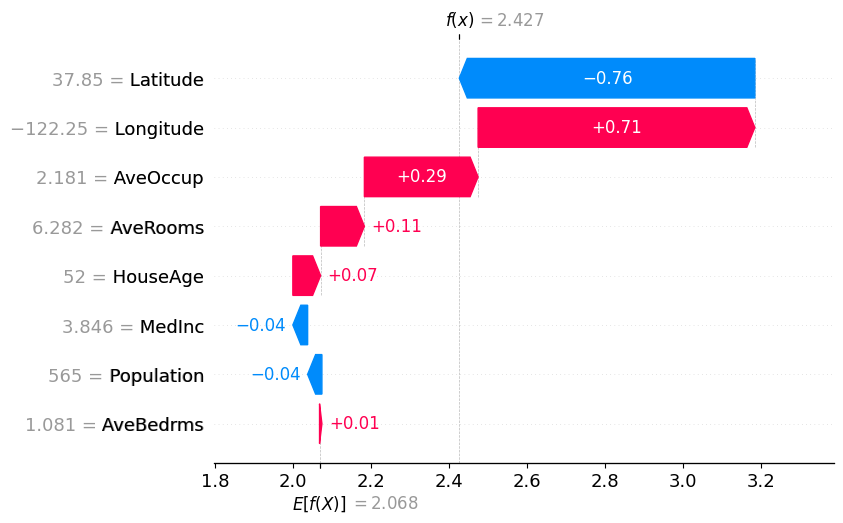

In [5]:
# visualize the first prediction's explanation
shap.initjs() 
shap.plots.waterfall(shap_values[4])

In [6]:
shap.initjs()
# show a aggregated force plot for various data
shap.plots.force(shap_values[:500])

(500, 8)

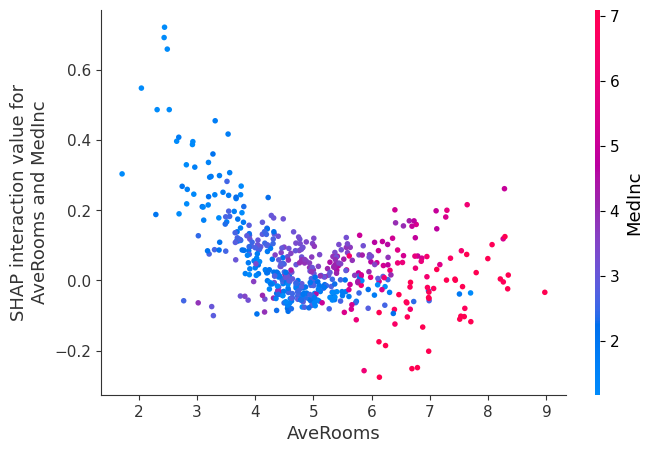

In [25]:
X_sample = X[:500]
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_sample)
shap.dependence_plot(
    ("AveRooms", "MedInc"),
    shap_interaction_values, X_sample,
    display_features=X_sample
)

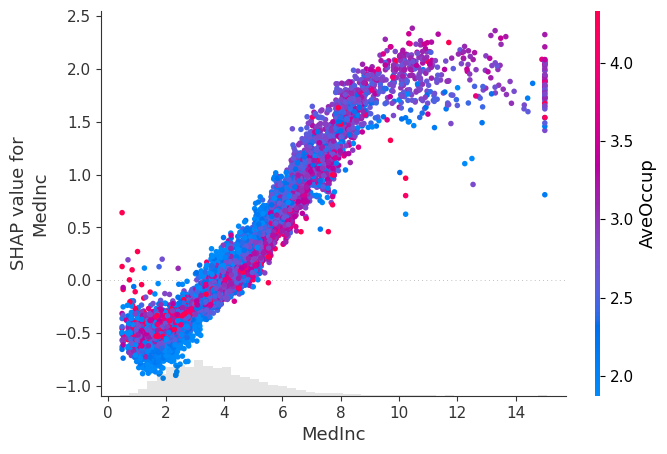

In [26]:
# shap vallue for single feature, e.g. "Latitude" vs "Shapley value"
shap.plots.scatter(shap_values[:, "MedInc"], color=shap_values)


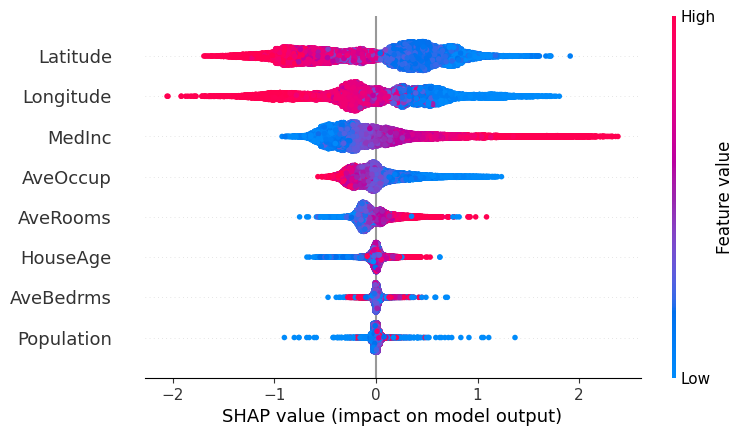

In [8]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

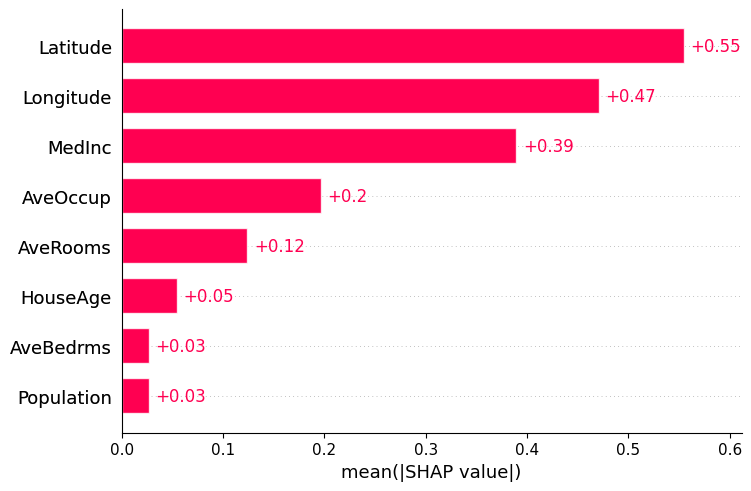

In [9]:
# mean abs value of shap values
shap.plots.bar(shap_values)